In [1]:
%cd ~/SSMuLA
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

/disk2/fli/SSMuLA


A notebook for regerating the MDLE, ALDE and ftALDE line plots

In [35]:
import pandas as pd

from SSMuLA.landscape_global import N_SAMPLE_LIST
from SSMuLA.de_simulations import DE_TYPES
from SSMuLA.mlde_analysis import (
    plot_de_vs_mlde,
    PLOT_MLDE_METRICS,
    PLOT_DE_METRICS,
    PLOT_LINE_PERFORMANCE_YAXIS,
    DE_LEGEND_MAP,
    plot_ftmlde_simple,
    plot_ftalde,
    plot_ftmlde_doubles,
    plot_ftmlde_ensemble
)


%matplotlib inline

In [5]:
de_csv = "results4upload/de/all_landscape_de_summary.csv"
mlde_csv = "results4upload/mlde/all_results.csv"
alde_dir = "results4upload/alde"
lib_stat = pd.read_csv("results4upload/landscape/lib_stats.csv")
active_cutoff = 1
active_lib_list = lib_stat[lib_stat["percent_active"]>=active_cutoff]["lib"].values
inactive_lib_list = lib_stat[lib_stat["percent_active"]<active_cutoff]["lib"].values

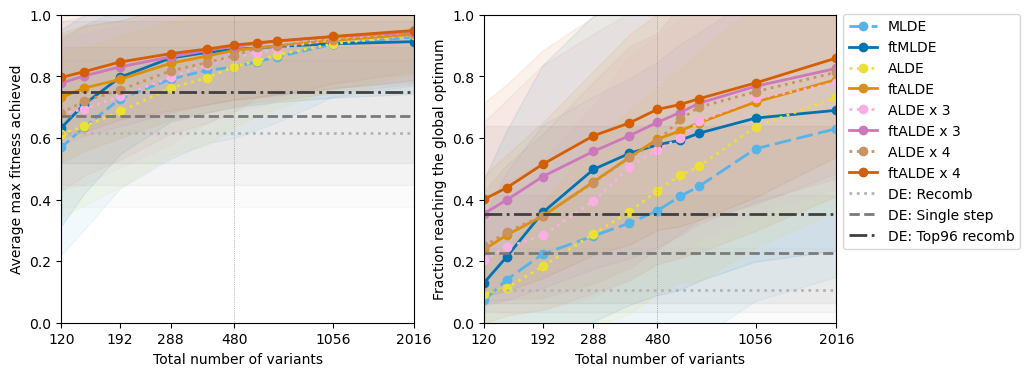

In [6]:
# >= 1% active
de_avg, avg_mlde_df_dict = plot_de_vs_mlde(
    de_csv=de_csv,
    mlde_csv=mlde_csv,
    alde_dir=alde_dir,
    lib_list=active_lib_list,
    fig_name="2a",
    # n_top = 96, n_corr = 384, 
    ifsave = True, 
    fig_dir = "figs"
)

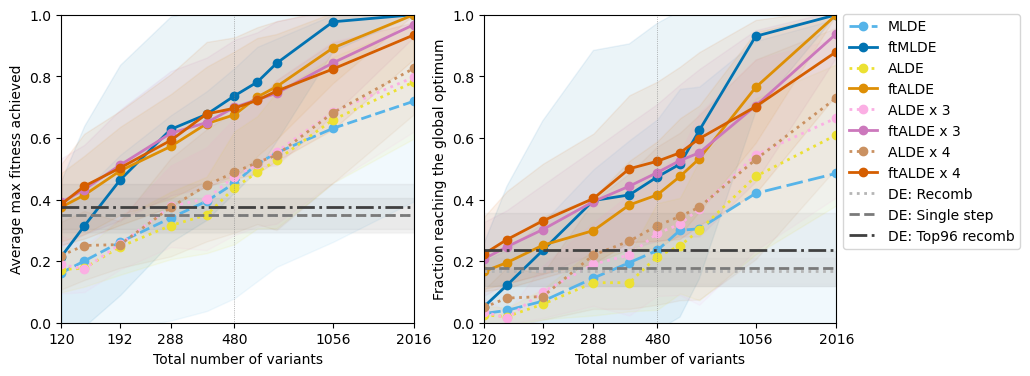

In [10]:
# < 1% active
de_avg, avg_mlde_df_dict = plot_de_vs_mlde(
    de_csv=de_csv,
    mlde_csv=mlde_csv,
    alde_dir=alde_dir,
    lib_list=inactive_lib_list,
    fig_name="s1",
    # n_top = 96, n_corr = 384, 
    ifsave = True, 
    fig_dir = "figs"
)

In [7]:
# metric_index = ["DE Type", "Metric"]
sum_de_mlde = pd.DataFrame(index= N_SAMPLE_LIST)
# Set the name of the index manually
sum_de_mlde.index.name = "Number of training sample"

for de in DE_TYPES:
    for i, (de_metric, mlde_metric) in enumerate(zip(PLOT_DE_METRICS, PLOT_MLDE_METRICS)):
        # col_info = {metric_index[0]: de, metric_index[1]: mlde_metric}

        improve_stat = (
            (
                avg_mlde_df_dict["MLDE"][f"{mlde_metric}_mean"]
                - de_avg.loc[de, f"{de_metric}_mean"]
            )
            / de_avg.loc[de, f"{de_metric}_mean"]
            * 100
        )
        col_info = {n: v for n, v in zip(N_SAMPLE_LIST, improve_stat)}
        # for n, v in zip(N_SAMPLE_LIST, improve_stat):
        #     col_info[n] = v

        sum_de_mlde = sum_de_mlde.merge(
            pd.Series(
                col_info,
                index=N_SAMPLE_LIST,
                name=f"{PLOT_LINE_PERFORMANCE_YAXIS[i]} percent improvement from DE: {DE_LEGEND_MAP[de]}",
            ).to_frame(),
            left_index=True,
            right_index=True,
            how="left",
        )

sum_de_mlde = sum_de_mlde.applymap(lambda x: round(x, 2))
sum_de_mlde


,Average max fitness achieved percent improvement from DE: Recomb,Fraction reaching the global optimum percent improvement from DE: Recomb,Average max fitness achieved percent improvement from DE: Single step,Fraction reaching the global optimum percent improvement from DE: Single step,Average max fitness achieved percent improvement from DE: Top96 recomb,Fraction reaching the global optimum percent improvement from DE: Top96 recomb
Number of training sample,,,,,,
24,-7.35,-31.60,-15.25,-67.40,-23.89,-79.13
48,3.13,30.59,-5.66,-37.76,-15.28,-60.16
96,18.29,108.32,8.20,-0.71,-2.84,-36.44
192,28.66,162.73,17.69,25.22,5.68,-19.84
288,33.27,201.60,21.91,43.75,9.47,-7.98
384,34.95,238.91,23.44,61.53,10.85,3.40
480,37.94,282.44,26.17,82.28,13.30,16.69
576,40.24,313.53,28.28,97.09,15.20,26.17
960,47.09,427.02,34.54,151.18,20.82,60.80


In [8]:
(
    (avg_mlde_df_dict["Average ftMLDE"] - avg_mlde_df_dict["MLDE"])
    / avg_mlde_df_dict["MLDE"]
    * 100
)[["top_maxes_mean", "if_truemaxs_mean"]].applymap(lambda x: round(x, 2))

,top_maxes_mean,if_truemaxs_mean
24,11.17,76.89
48,11.86,53.57
96,9.57,60.32
192,8.64,76.73
288,7.08,70.02
384,6.94,58.94
480,5.18,44.44
576,4.04,38.85
960,0.13,17.60
1920,-1.60,9.48


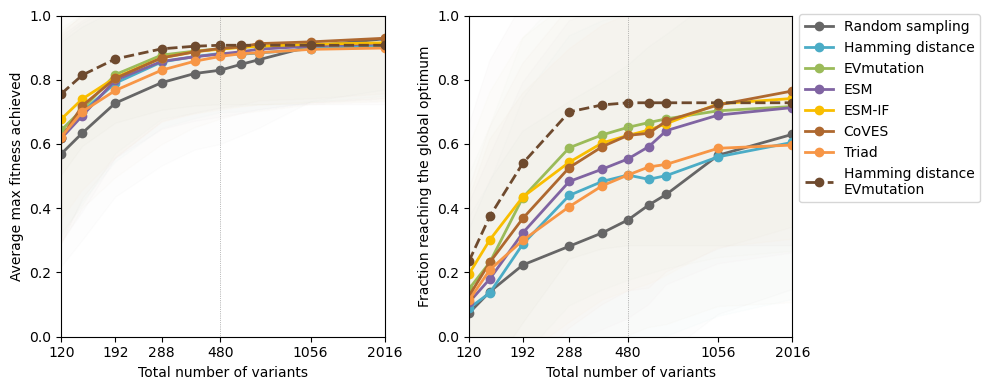

In [30]:
plot_ftmlde_simple(
    mlde_csv="results4upload/mlde/all_results.csv",
    lib_list=active_lib_list,
    fig_name="3e",
    ifsave = True,
    fig_dir = "figs"
)

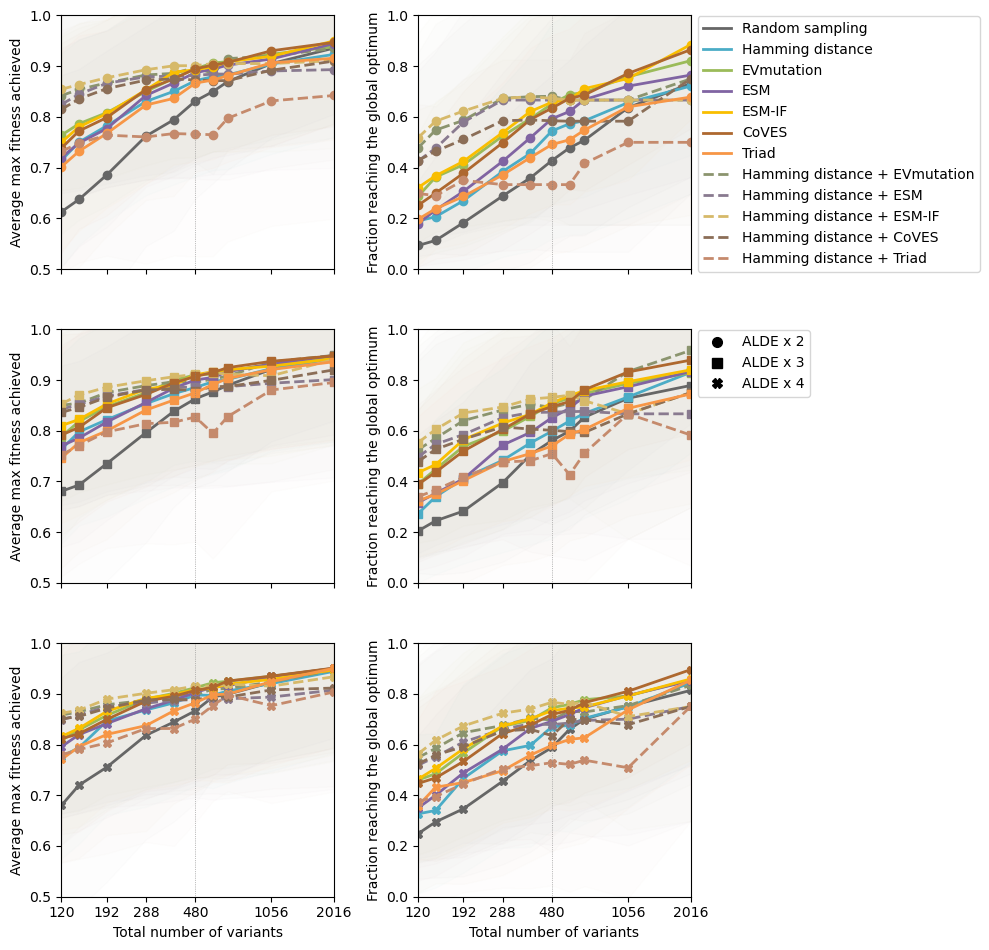

In [27]:
# alde for >= 1% active
plot_ftalde(
    alde_dir=alde_dir,
    lib_list=active_lib_list,
    fig_name="s7",
    ifsave = True,
    fig_dir = "figs",
)

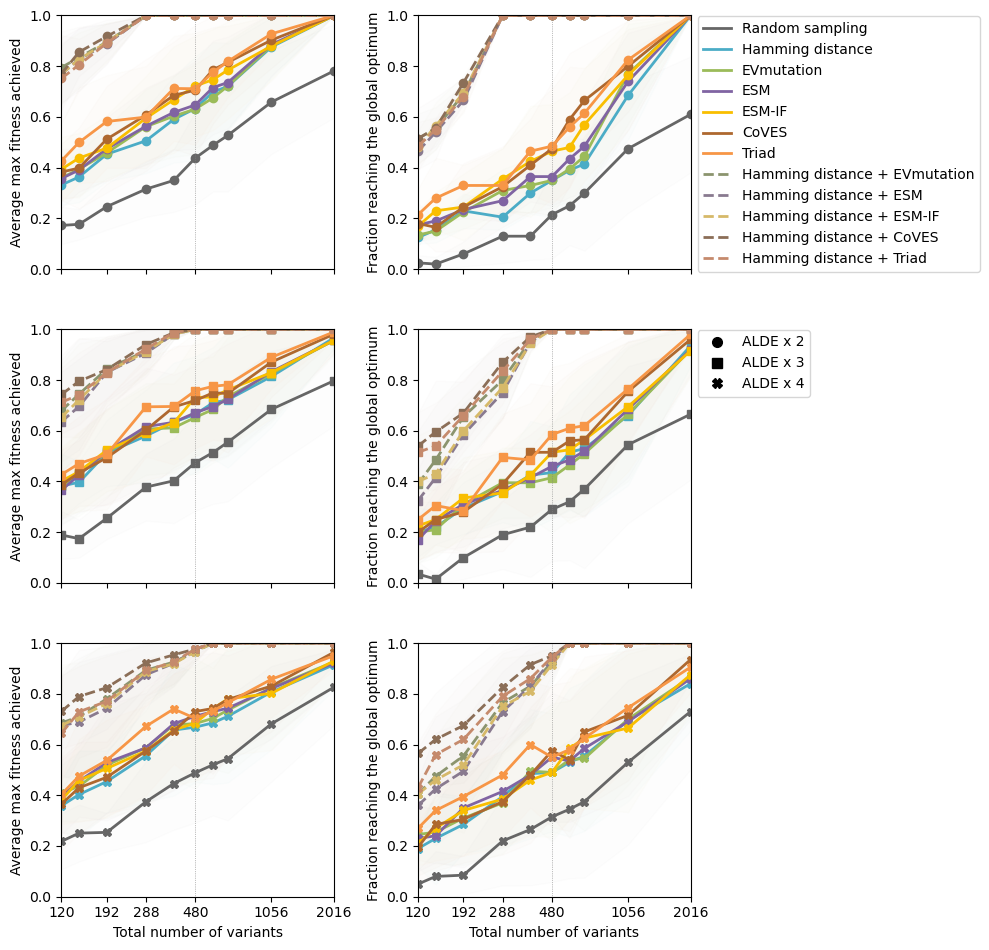

In [29]:
# alde for < 1% active
plot_ftalde(
    alde_dir=alde_dir,
    lib_list=inactive_lib_list,
    fig_name="s9",
    ifsave = True,
    fig_dir = "figs",
)

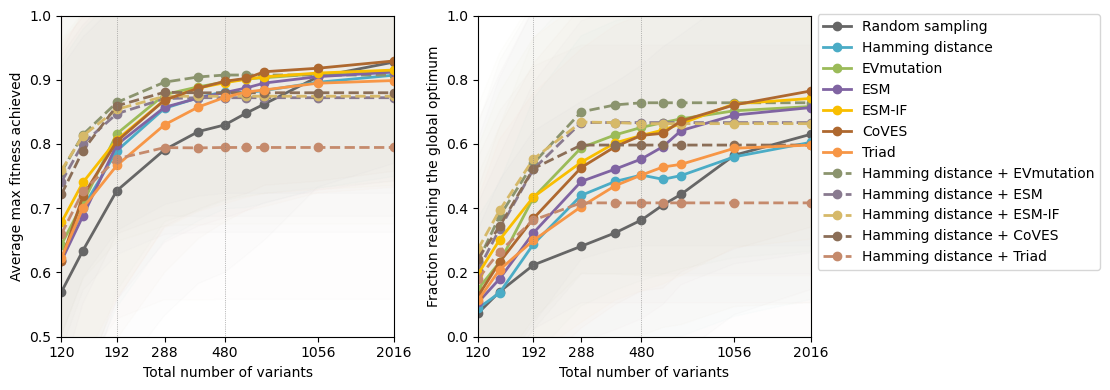

In [34]:
plot_ftmlde_doubles(
    mlde_csv=mlde_csv,
    lib_list=active_lib_list,
    fig_name="s10",
    ifsave = True,
    fig_dir = "figs",
)

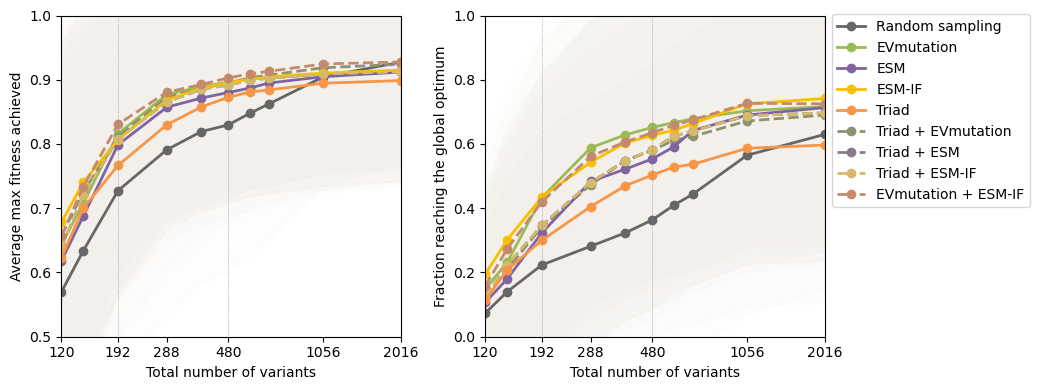

In [38]:
plot_ftmlde_ensemble(
    mlde_csv=mlde_csv,
    lib_list=active_lib_list,
    fig_name="s11",
    ifsave = True,
    fig_dir = "figs",
)

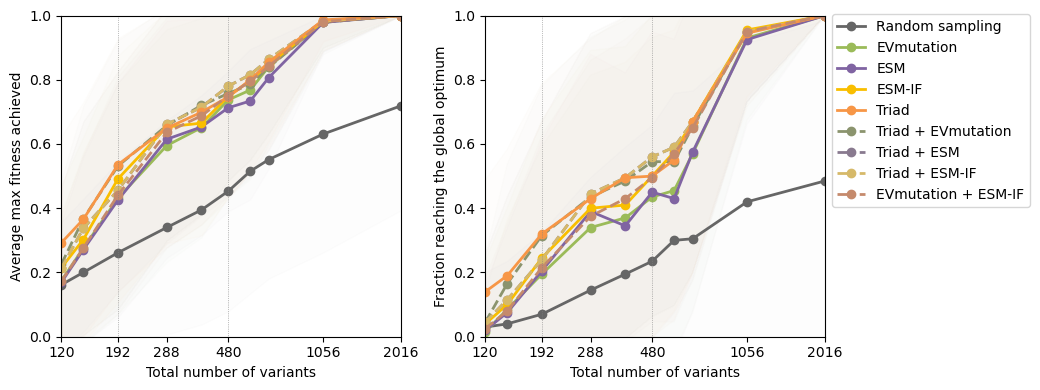

In [40]:
plot_ftmlde_ensemble(
    mlde_csv=mlde_csv,
    lib_list=inactive_lib_list,
    fig_name="s11_2",
    ifsave = False,
    fig_dir = "figs",
)